# Demo notebook for batch generation of synthetic 3D images with lines and corrupting them with noise and Gaussian blur

In [1]:
import numpy as np
import os
from skimage import io
import json

from cs_sim.batch.batch_corrupt import batch_corrupt_image
from cs_sim.batch.batch_synth import batch_generate_img_with_lines

## Specify and save parameters for a synthetic image

In [2]:
params_synth_data = dict(
    imgshape=(20, 100, 100),
    n_lines=10,
    maxval=255,
    n_points=100
)

In [3]:
param_fn_synth = 'parameters_synthetic.json'

In [4]:
with open(param_fn_synth, 'w') as f:
    json.dump(params_synth_data, f, indent=4)

## Read synthetic data parameters from file and generate synthetic images in batch

In [5]:
with open(param_fn_synth) as f:
    params = json.load(f)
params

{'imgshape': [20, 100, 100], 'n_lines': 10, 'maxval': 255, 'n_points': 100}

In [6]:
batch_generate_img_with_lines(n_img=10, n_jobs=10, dir_out='test_input', **params);

/research/sharedresources/cbi/common/Anna/codes/CS-Sim/cs_sim/batch/batch_synth.py:48: UserWarning: test_input/line_img_00000.tif is a low contrast image
  io.imsave(fn_out, img.astype(__get_type(img)))
/research/sharedresources/cbi/common/Anna/codes/CS-Sim/cs_sim/batch/batch_synth.py:48: UserWarning: test_input/line_img_00001.tif is a low contrast image
  io.imsave(fn_out, img.astype(__get_type(img)))
/research/sharedresources/cbi/common/Anna/codes/CS-Sim/cs_sim/batch/batch_synth.py:48: UserWarning: test_input/line_img_00003.tif is a low contrast image
  io.imsave(fn_out, img.astype(__get_type(img)))
/research/sharedresources/cbi/common/Anna/codes/CS-Sim/cs_sim/batch/batch_synth.py:48: UserWarning: test_input/line_img_00002.tif is a low contrast image
  io.imsave(fn_out, img.astype(__get_type(img)))
/research/sharedresources/cbi/common/Anna/codes/CS-Sim/cs_sim/batch/batch_synth.py:48: UserWarning: test_input/line_img_00005.tif is a low contrast image
  io.imsave(fn_out, img.astype(__g

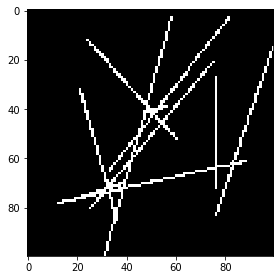

In [7]:
io.imshow(io.imread(os.path.join('test_input', os.listdir('test_input')[0])).max(0))

## Specify and save parameters for image corruption with noise and blurring

There are 4 steps that can be combined in any order:

1. Perlin noise: adds low-frequency background. The `size` parameter specifies the size of the low-frequency pattern (in pixels), the `value` parameter specifies the amplitude.
2. Convolve: convolves the image with either a specified PSF image (`psf` parameter), or with a gaussian kernel of specified `sigma`. 
3. Poisson noise, with specified `snr`.
4. Gaussian noise, with specified `snr`.

In [8]:
corruption_steps = [
    ('perlin_noise', {'size': 50, 'value': 0.1}),
    ('poisson_noise', {'snr': 2}),
    ('convolve', {'sigma': 2}),
    ('gaussian_noise', {'snr': 100})
]

In [9]:
param_fn_corruption = 'corruption_steps.json'

In [10]:
with open(param_fn_corruption, 'w') as f:
    json.dump(corruption_steps, f, indent=4)

## Read the corruption steps from json file and apply them to the synthetic line images

In [11]:
with open(param_fn_corruption) as f:
    corr_steps = json.load(f)
corr_steps

[['perlin_noise', {'size': 50, 'value': 0.1}],
 ['poisson_noise', {'snr': 2}],
 ['convolve', {'sigma': 2}],
 ['gaussian_noise', {'snr': 100}]]

In [12]:
batch_corrupt_image('test_input', 'test_output', corr_steps, n_jobs=10)

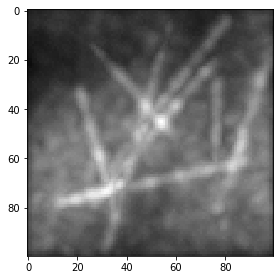

In [13]:
io.imshow(io.imread(os.path.join('test_output', os.listdir('test_output')[0])).max(0))